# Investing in Stocks Buy-and-Hold versus Momentum trading using MPT





*   Rohit Reddy Marreddy (rrm22003)




# Importing Required Modules

In [ ]:
%%capture
import sys
import os

if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin
    os.environ['PATH'] += ':bin'

In [ ]:
# download solvers
%%capture
import sys
import os
if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin
    os.environ['PATH'] += ':bin'

# helpful modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *

In [ ]:
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

# EDA Process for the Data

In [ ]:
import pandas as pd

# Let us have a look into the data provided
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

# We are team 8 and we have the below stocks
sectors = ['Industrials', 'Technology', 'Real Estate']
df_filtered = df[df['GICS Sector'].isin(sectors)]

# Let us separte the given stocks to us accordingly
df_grouped = df_filtered.groupby('GICS Sector').head(5)

print(df_grouped)

   Symbol                         Security  GICS Sector  \
0     MMM                               3M  Industrials   
1     AOS                      A. O. Smith  Industrials   
14    ARE  Alexandria Real Estate Equities  Real Estate   
16   ALLE                         Allegion  Industrials   
25    AAL          American Airlines Group  Industrials   
29    AMT                   American Tower  Real Estate   
32    AME                           Ametek  Industrials   
52    AVB            AvalonBay Communities  Real Estate   
72    BXP                Boston Properties  Real Estate   
83    CPT            Camden Property Trust  Real Estate   

                    GICS Sub-Industry  Headquarters Location  Date added  \
0            Industrial Conglomerates  Saint Paul, Minnesota  1957-03-04   
1                   Building Products   Milwaukee, Wisconsin  2017-07-26   
14                       Office REITs   Pasadena, California  2017-03-20   
16                  Building Products        D

In [ ]:
# Let us select 10 stocks from each sector
tickers_list = ['MMM', 'BA', 'CAT', 'CSX', 'DE', 'ETN', 'HON', 'UNP', 'NOC', 'LMT', 'ACN', 'ADBE', 'ADI', 'ADSK', 'CSCO', 'CTSH', 'HPQ', 'IBM', 'INTC', 'MSFT', 'WY', 'EQR', 'SPG', 'PLD', 'PSA', 'DXP', 'KIM', 'AVB', 'AMT', 'DOC' ]
# We have to provide the dates for the stocks to reterive the data from each sector

dow_prices = {ticker : si.get_data(ticker,start_date = '1/1/2017',end_date='12/31/2023',interval='1d') for ticker in tickers_list}
dow_prices

{'MMM':                   open        high         low       close    adjclose  \
 2017-01-03  149.523407  150.501678  148.177261  148.871231  108.135056   
 2017-01-04  148.854507  149.581940  148.503342  149.096985  108.299034   
 2017-01-05  149.046829  149.782608  147.901337  148.586960  107.928574   
 2017-01-06  148.235779  149.331100  146.989960  149.021744  108.244385   
 2017-01-09  149.138794  149.147156  148.160538  148.219070  107.661346   
 ...                ...         ...         ...         ...         ...   
 2023-12-22   88.528427   89.807693   88.419731   88.904678   87.167412   
 2023-12-26   88.879601   90.794312   88.854515   90.392975   88.626625   
 2023-12-27   90.301003   91.220734   90.033447   90.919731   89.143089   
 2023-12-28   90.852844   92.123749   90.844482   91.714050   89.921883   
 2023-12-29   91.555183   91.939796   90.928093   91.404678   89.618561   
 
              volume ticker  
 2017-01-03  3001123    MMM  
 2017-01-04  1844232    MMM  
 

In [ ]:
# Extracting useful data using adjclose and creating a DataFrame for the first ticker
prep_data = pd.DataFrame(dow_prices[tickers_list[0]]['adjclose']).rename(columns={"adjclose": tickers_list[0]})

# Merging data for other tickers
for i in tickers_list[1:]:
    prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])

# Displaying the prepared data
prep_data


,MMM,BA,CAT,CSX,DE,ETN,HON,UNP,NOC,LMT,...,WY,EQR,SPG,PLD,PSA,DXP,KIM,AVB,AMT,DOC
2017-01-03,108.135056,145.533646,78.646889,10.862660,92.879776,57.909924,95.971329,87.507088,209.344345,209.162766,...,22.563393,49.266502,123.646324,43.559551,166.566315,17181.800781,17.563053,138.129318,89.910614,20.790277
2017-01-04,108.299034,147.063461,78.295448,11.086632,94.459770,57.605701,96.235664,88.036285,209.665161,209.724182,...,22.764055,49.769764,124.634819,44.335056,167.788406,17272.699219,17.964415,138.700195,90.071541,21.251040
2017-01-05,107.928574,147.146912,77.818527,11.195589,94.040230,56.912788,96.450439,87.174225,210.324707,211.367416,...,23.001879,50.443386,124.851524,44.351543,169.576874,17272.699219,18.040539,139.544861,89.758179,21.746714
2017-01-06,108.244385,147.508499,77.851982,11.356005,95.057831,57.470509,97.912582,88.079002,210.984253,212.911530,...,22.927563,50.621471,126.496780,44.640289,170.165588,17272.699219,17.909056,140.772766,89.165253,21.795582
2017-01-09,107.661346,146.785324,77.291344,11.195589,93.897369,56.515621,97.103035,87.421745,210.164276,212.878510,...,23.016747,49.916893,125.873878,44.302044,169.003036,17000.000000,17.694534,138.598572,88.953491,21.509352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,87.167412,260.440002,289.020966,34.520527,393.909271,237.895065,204.515884,242.329849,461.235138,444.955353,...,34.016365,59.847900,140.478271,131.427872,294.865692,NaN,21.494635,183.912201,211.597473,19.363056
2023-12-26,88.626625,262.790009,294.266693,34.839516,398.326599,239.460175,206.902756,244.031052,462.599518,446.901062,...,34.283665,60.112194,141.820862,132.480103,298.775085,NaN,21.593416,184.835266,212.629959,19.618607
2023-12-27,89.143089,262.100006,296.745209,34.540462,398.693939,240.068268,207.877411,244.548401,462.320679,445.699890,...,34.412361,60.562469,141.830734,133.194809,302.140106,NaN,21.504513,186.072540,214.790543,19.677582
2023-12-28,89.921883,260.350006,295.510925,34.630180,397.787292,239.998489,208.026596,244.757324,463.774689,447.943451,...,34.748962,61.179157,142.432922,134.197403,304.634186,NaN,21.534145,187.815979,215.226624,19.834846


In [ ]:
# Creating a DataFrame called return_data to store the percentage change in prices (returns) for each ticker in the tickers_list
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()
# Check and dropping down the null values
return_data.dropna(inplace=True)
return_data

,MMM,BA,CAT,CSX,DE,ETN,HON,UNP,NOC,LMT,...,WY,EQR,SPG,PLD,PSA,DXP,KIM,AVB,AMT,DOC
2017-01-04,0.001516,0.010512,-0.004469,0.020618,0.017011,-0.005253,0.002754,0.006047,0.001532,0.002684,...,0.008893,0.010215,0.007995,0.017803,0.007337,0.005290,0.022853,0.004133,0.001790,0.022162
2017-01-05,-0.003421,0.000567,-0.006091,0.009828,-0.004441,-0.012029,0.002232,-0.009792,0.003146,0.007835,...,0.010447,0.013535,0.001739,0.000372,0.010659,0.000000,0.004237,0.006090,-0.003479,0.023325
2017-01-06,0.002926,0.002457,0.000430,0.014328,0.010821,0.009800,0.015160,0.010379,0.003136,0.007305,...,-0.003231,0.003530,0.013178,0.006510,0.003472,0.000000,-0.007288,0.008799,-0.006606,0.002247
2017-01-09,-0.005386,-0.004903,-0.007201,-0.014126,-0.012208,-0.016615,-0.008268,-0.007462,-0.003886,-0.000155,...,0.003890,-0.013919,-0.004924,-0.007577,-0.006832,-0.015788,-0.011978,-0.015445,-0.002375,-0.013132
2017-01-10,-0.003892,0.004737,0.015806,0.011625,-0.002852,0.004934,0.002552,0.009764,-0.011450,-0.006361,...,-0.007749,-0.009152,-0.009252,-0.022905,-0.006570,-0.032088,-0.016817,-0.002257,-0.014473,-0.024667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.007294,-0.006030,0.001000,0.004933,0.008847,0.005689,0.002877,0.006072,0.008514,0.000446,...,0.007329,0.005261,0.000562,0.010996,0.002659,0.000000,-0.003663,0.003429,0.004247,0.015464
2023-12-26,0.016740,0.009023,0.018150,0.009241,0.011214,0.006579,0.011671,0.007020,0.002958,0.004373,...,0.007858,0.004416,0.009557,0.008006,0.013258,0.000000,0.004596,0.005019,0.004879,0.013198
2023-12-27,0.005827,-0.002626,0.008423,-0.008584,0.000922,0.002539,0.004711,0.002120,-0.000603,-0.002688,...,0.003754,0.007491,0.000070,0.005395,0.011263,0.000000,-0.004117,0.006694,0.010161,0.003006
2023-12-28,0.008736,-0.006677,-0.004159,0.002597,-0.002274,-0.000291,0.000718,0.000854,0.003145,0.005034,...,0.009781,0.010183,0.004246,0.007527,0.008255,0.000000,0.001378,0.009370,0.002030,0.007992


## Time Series Visualizations of all stocks

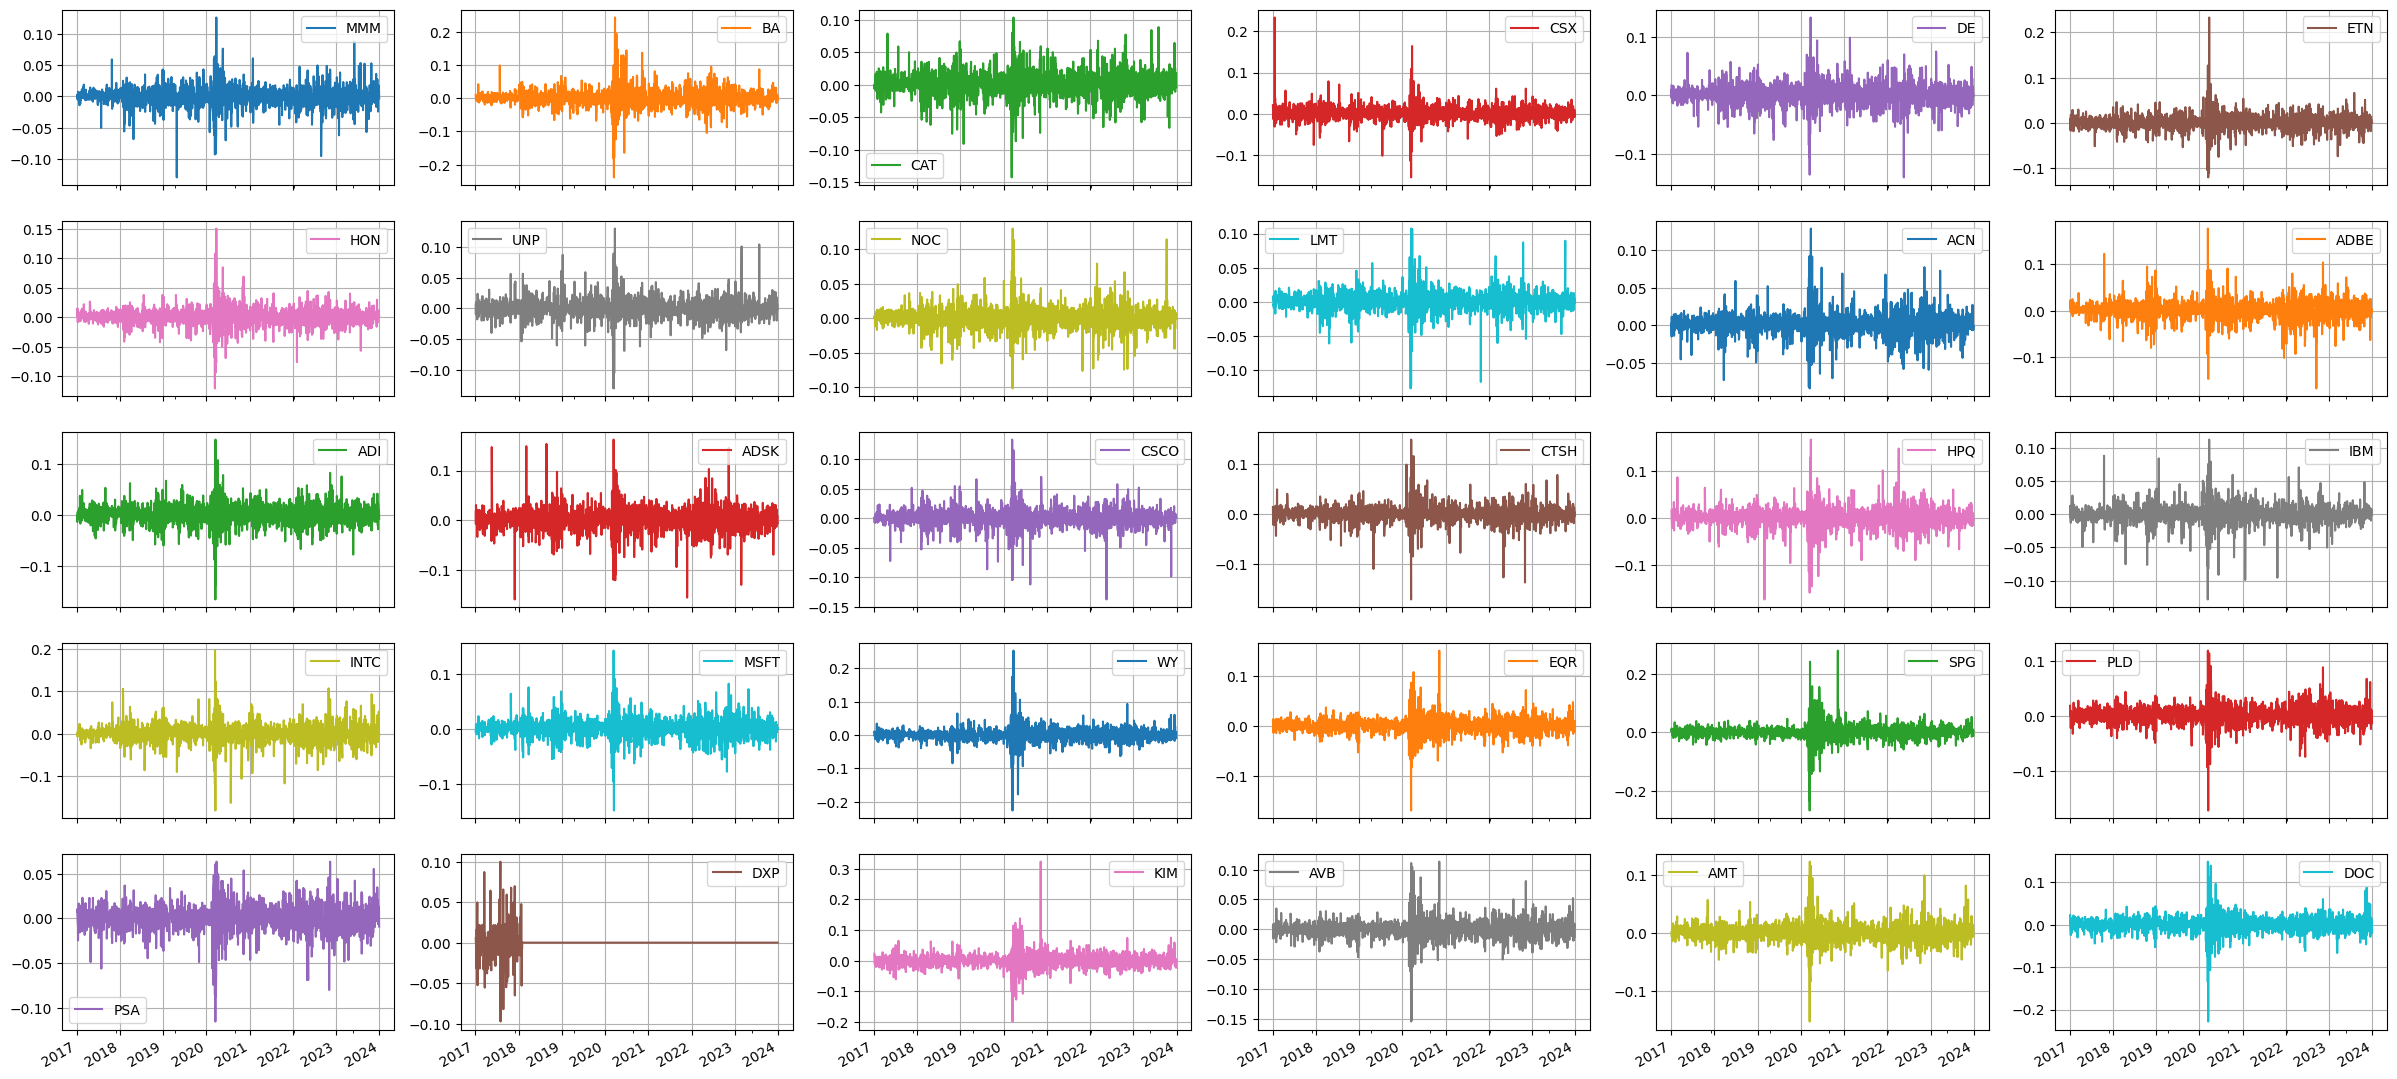

In [ ]:
return_data.plot(subplots=True, grid=True, layout=(5, 6), figsize=(30, 15))
plt.show()


## Performance of the Stocks

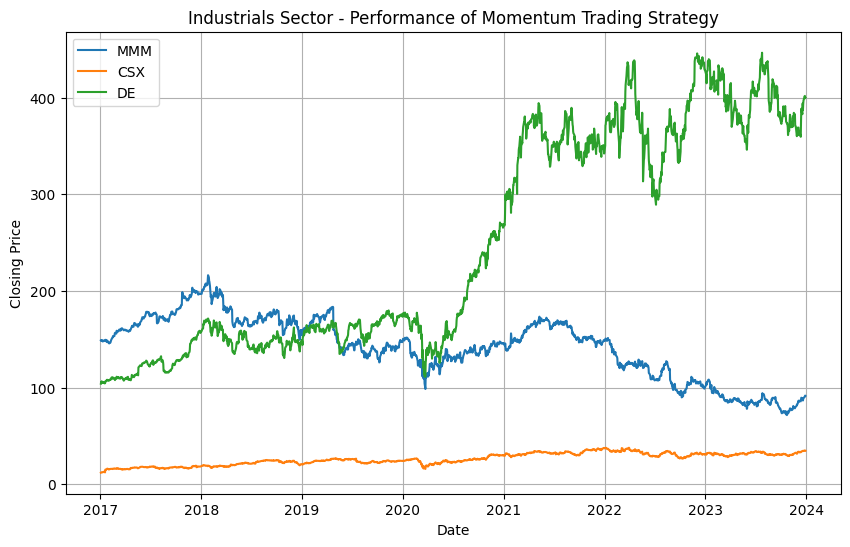

/usr/local/lib/python3.10/dist-packages/yahoo_fin/stock_info.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['ticker'] = ticker.upper()
<ipython-input-49-076fc98f7b64>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Short_MA'] = stock_data['close'].rolling(short_window).mean()
<ipython-input-49-076fc98f7b64>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

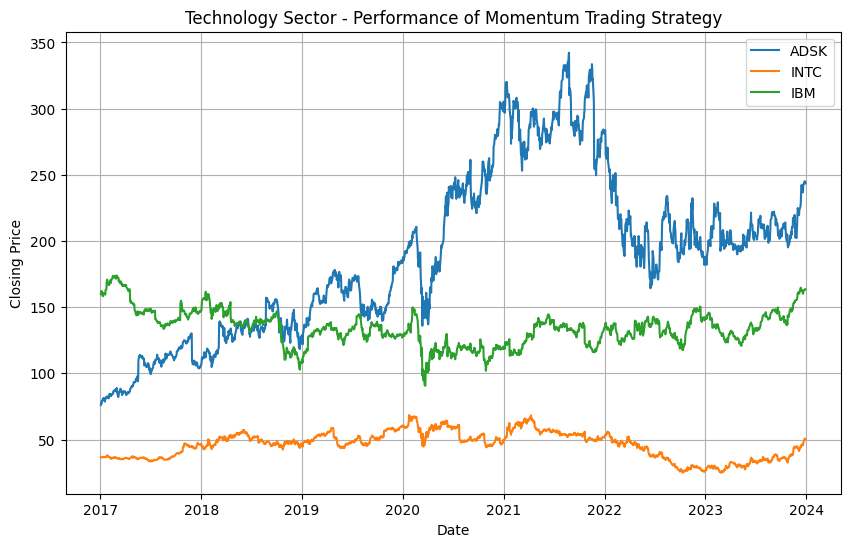

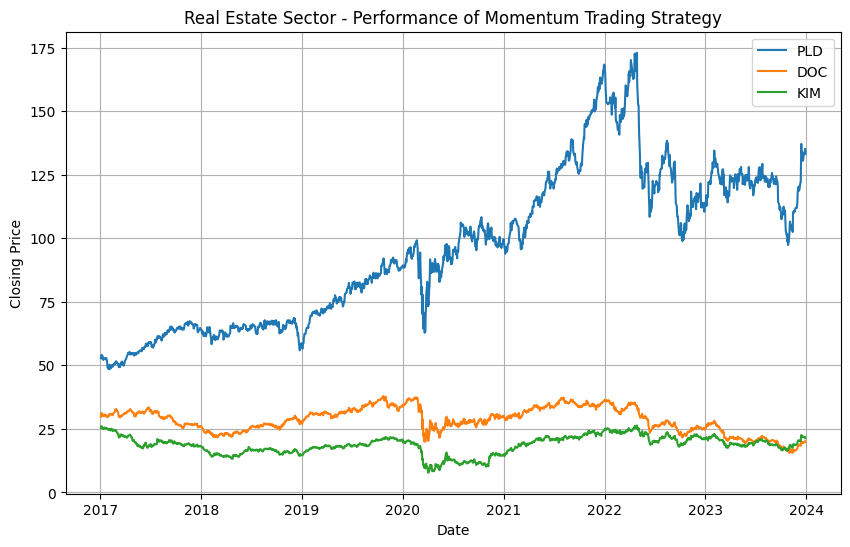

In [ ]:
!pip install yahoo_fin
import numpy as np
import pandas as pd
import yahoo_fin.stock_info as si
import matplotlib.pyplot as plt

# Define the tickers list and sectors dictionary
sectors_with_tickers = {
    'Industrials': ['MMM', 'BA', 'CAT', 'CSX', 'DE', 'ETN', 'HON', 'UNP', 'NOC', 'LMT'],
    'Technology': ['ACN', 'ADBE', 'ADI', 'ADSK', 'CSCO', 'CTSH', 'HPQ', 'IBM', 'INTC', 'MSFT'],
    'Real Estate': ['WY', 'EQR', 'SPG', 'PLD', 'PSA', 'DXP', 'KIM', 'AVB', 'AMT', 'DOC']
}

# Define the momentum trading function
def momentum_trading(ticker, start_date='01/01/2017', end_date='12/31/2023', short_window=8, long_window=21):
    # Fetch historical price data
    stock_data = si.get_data(ticker, start_date=start_date, end_date=end_date, interval='1d')

    # Compute moving averages
    stock_data['Short_MA'] = stock_data['close'].rolling(short_window).mean()
    stock_data['Long_MA'] = stock_data['close'].rolling(long_window).mean()

    # Generate trading signals
    stock_data['Signal'] = np.where(stock_data['Short_MA'] > stock_data['Long_MA'], 1, 0)
    stock_data['Signal'] = stock_data['Signal'].diff()  # Capture changes in the signal

    # Calculate returns
    stock_data['Return'] = stock_data['close'].pct_change()
    stock_data['System_Return'] = stock_data['Signal'] * stock_data['Return']

    # Calculate cumulative returns
    stock_data['Cumulative_Return'] = (1 + stock_data['System_Return']).cumprod()

    return stock_data['Cumulative_Return'][-1]  # Return the final cumulative return

# Iterate over sectors
for sector, tickers in sectors_with_tickers.items():
    sector_cumulative_returns = {}

    # Iterate over stocks in the sector
    for ticker in tickers:
        # Apply momentum trading strategy with custom moving average periods
        cumulative_return = momentum_trading(ticker, short_window=10, long_window=25)  # You can specify any values here
        sector_cumulative_returns[ticker] = cumulative_return

    # Sort stocks by cumulative return
    sorted_cumulative_returns = sorted(sector_cumulative_returns.items(), key=lambda x: x[1], reverse=True)

    # Select the top 3 performing stocks
    top_performing_stocks = dict(sorted_cumulative_returns[:3])

    # Plot performance for each stock in the sector
    plt.figure(figsize=(10, 6))
    plt.title(f'{sector} Sector - Performance of Momentum Trading Strategy')
    for ticker, _ in top_performing_stocks.items():
        stock_data = si.get_data(ticker, start_date='01/01/2017', end_date='12/31/2023', interval='1d')
        plt.plot(stock_data.index, stock_data['close'], label=ticker)
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid(True)
    plt.show()


## Information about Performance of the Stocks


**Industrials Sector:** The graph suggests the momentum strategy in industrials might have captured some upward trends. Both MMM and CSX stocks show price increases, with steeper slopes in some periods, potentially indicating momentum capture. For example, CSX's price increase around mid-2020 followed by a correction could be a momentum trade that capitalized on an upswing and exited. While the strategy appears promising, a more complete analysis would consider transaction costs, a broader market benchmark for comparison, and the strategy's performance across different market conditions.



**Technology Sector:** The graph likely shows the performance of a momentum strategy in the technology sector over time. Dates are likely on the x-axis, with prices (stock prices or portfolio value) on the y-axis. Lines might represent individual stocks (ADSK, INTC, IBM) or the momentum portfolio. Steeper upward slopes in the momentum line compared to individual stocks could indicate successful momentum capture.



**Real Estate Sector:** The graph likely shows the performance of a momentum strategy in the technology sector over timeThe y-axis shows the closing price.The x-axis shows the date. There are markings from 2017 to 2024.. The labels for these are PLD, DOC, KIM,are the stocks
From the graph, the real estate sector seems to have been relatively stable over the past few years. There haven’t been any major spikes or dips, and the price has slowly increased over time.






## Momentum Trading

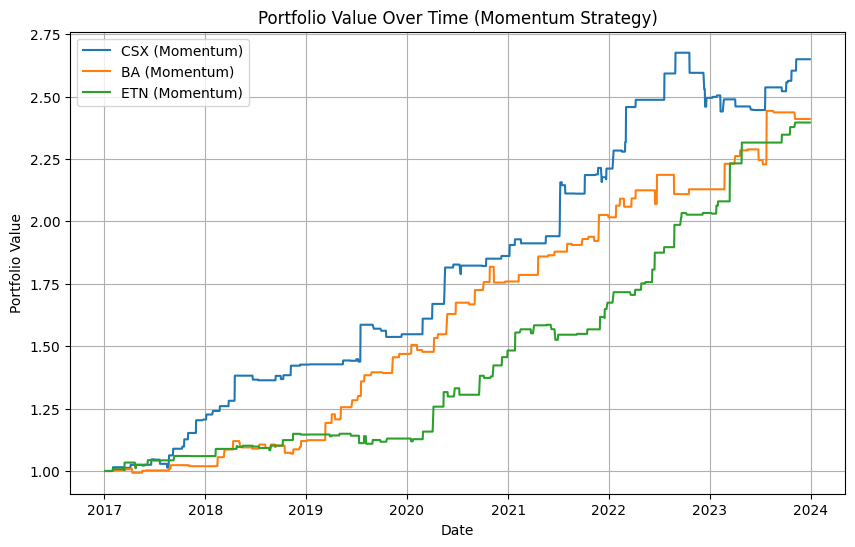

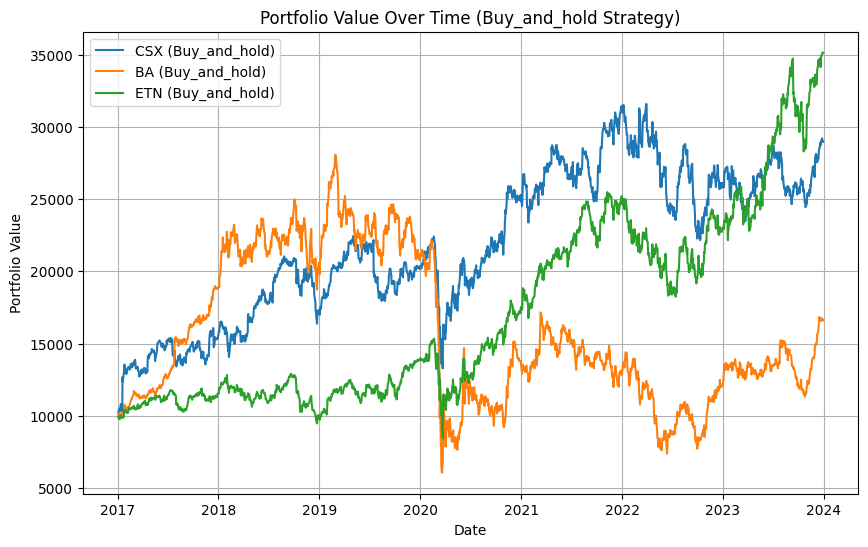

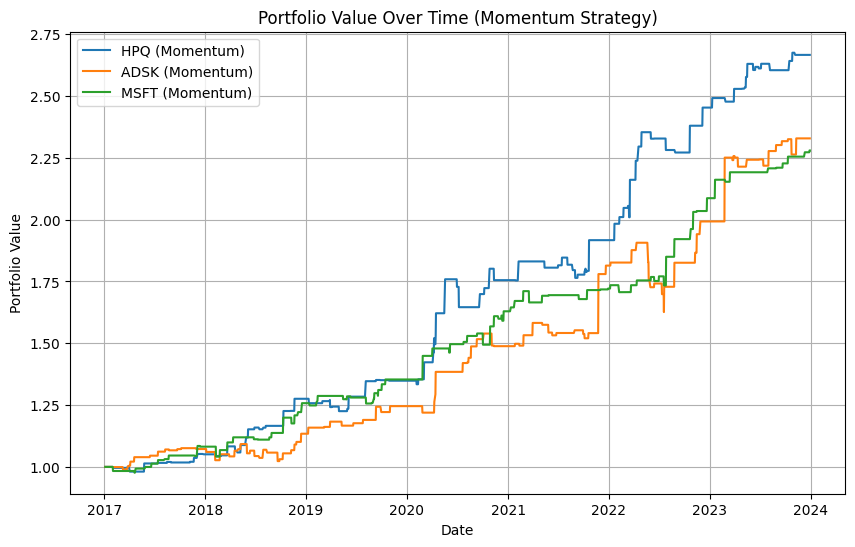

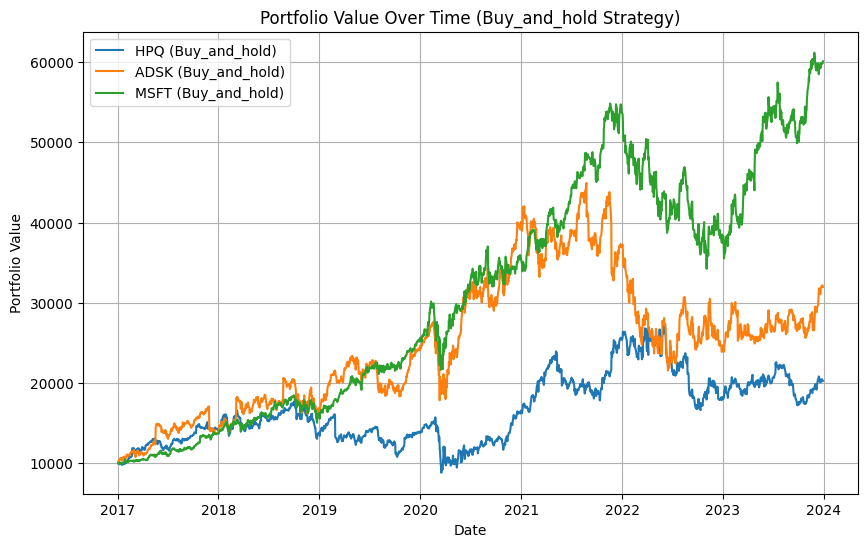

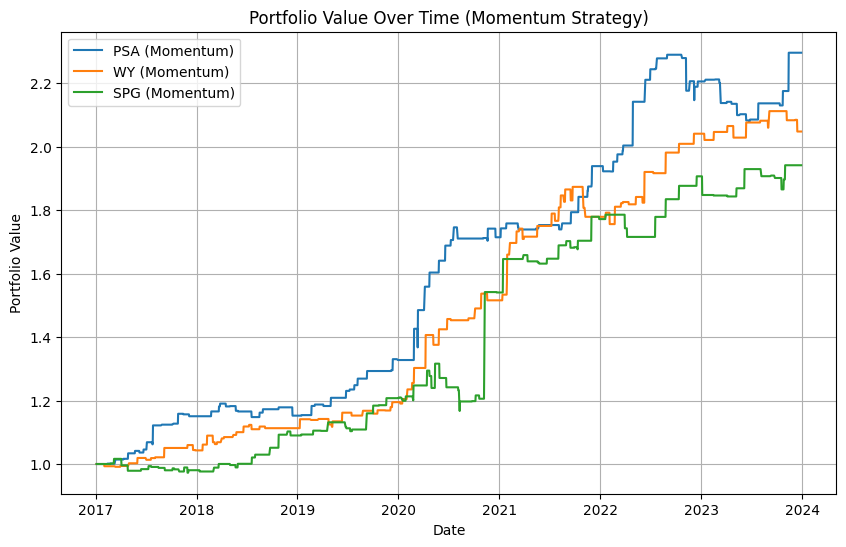

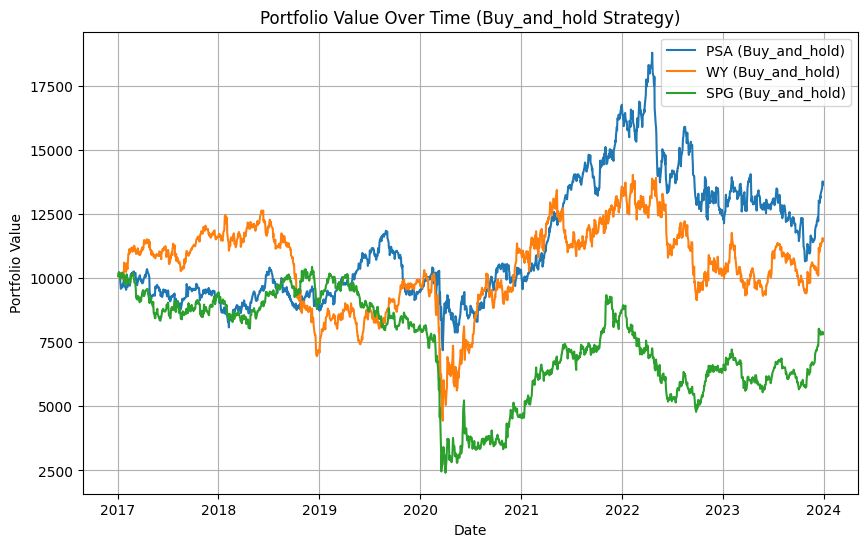

In [ ]:
import numpy as np
import pandas as pd
import yahoo_fin.stock_info as si
import matplotlib.pyplot as plt

# Define the tickers list and sectors dictionary
sectors_with_tickers = {
    'Industrials': ['MMM', 'BA', 'CAT', 'CSX', 'DE', 'ETN', 'HON', 'UNP', 'NOC', 'LMT'],
    'Technology': ['ACN', 'ADBE', 'ADI', 'ADSK', 'CSCO', 'CTSH', 'HPQ', 'IBM', 'INTC', 'MSFT'],
    'Real Estate': ['WY', 'EQR', 'SPG', 'PLD', 'PSA', 'DXP', 'KIM', 'AVB', 'AMT', 'DOC']
}

# Define the momentum trading function
def momentum_trading(ticker, start_date='01/01/2017', end_date='12/31/2023', short_window=8, long_window=21):
    # Fetch historical price data
    stock_data = si.get_data(ticker, start_date=start_date, end_date=end_date, interval='1d')

    # Compute moving averages
    stock_data['Short_MA'] = stock_data['close'].rolling(short_window).mean()
    stock_data['Long_MA'] = stock_data['close'].rolling(long_window).mean()

    # Generate trading signals
    stock_data['Signal'] = np.where(stock_data['Short_MA'] > stock_data['Long_MA'], 1, 0)
    stock_data['Signal'] = stock_data['Signal'].diff()  # Capture changes in the signal

    # Calculate returns
    stock_data['Return'] = stock_data['close'].pct_change()
    stock_data['System_Return'] = stock_data['Signal'] * stock_data['Return']

    # Calculate cumulative returns
    stock_data['Cumulative_Return'] = (1 + stock_data['System_Return']).cumprod()

    return stock_data[['Cumulative_Return']]  # Return DataFrame with only Cumulative_Return column

# Define function to calculate portfolio value over time for buy-and-hold strategy
def buy_and_hold_portfolio_value(ticker, start_date='01/01/2017', end_date='12/31/2023', initial_investment=10000):
    # Fetch historical price data
    stock_data = si.get_data(ticker, start_date=start_date, end_date=end_date, interval='1d')

    # Calculate daily returns
    stock_data['Return'] = stock_data['close'].pct_change()

    # Calculate cumulative returns
    stock_data['Cumulative_Return'] = (1 + stock_data['Return']).cumprod()

    # Calculate portfolio value over time
    stock_data['Portfolio_Value'] = initial_investment * stock_data['Cumulative_Return']

    return stock_data[['Portfolio_Value']]  # Return DataFrame with only Portfolio_Value column

# Define function to plot portfolio value over time
def plot_portfolio_value(tickers, strategy, initial_investment=10000):
    plt.figure(figsize=(10, 6))
    for ticker in tickers:
        if strategy == 'momentum':
            portfolio_value = momentum_trading(ticker)
        elif strategy == 'buy_and_hold':
            portfolio_value = buy_and_hold_portfolio_value(ticker)
        plt.plot(portfolio_value.index, portfolio_value['Cumulative_Return' if strategy == 'momentum' else 'Portfolio_Value'], label=f'{ticker} ({strategy.capitalize()})')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value')
    plt.title(f'Portfolio Value Over Time ({strategy.capitalize()} Strategy)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Get top three stocks for each sector
top_three_stocks = {}
for sector, tickers in sectors_with_tickers.items():
    # Calculate cumulative returns for each ticker and select the top three
    top_three_stocks[sector] = sorted(tickers, key=lambda x: momentum_trading(x)['Cumulative_Return'].iloc[-1], reverse=True)[:3]

# Plot portfolio value over time for each strategy for the top three stocks in each sector
for sector, tickers in top_three_stocks.items():
    plot_portfolio_value(tickers, 'momentum')
    plot_portfolio_value(tickers, 'buy_and_hold')

## Displaying the Top 9 Performing Stocks

In [ ]:
# Combine the top three stocks from each sector into a single list
top_nine_stocks = [stock for sector_stocks in top_three_stocks.values() for stock in sector_stocks]

print("Top nine stocks:", top_nine_stocks)

# Dictionary containing stock symbols and their corresponding full names
stocks = {
    'CSX': 'CSX Corporation',
    'BA': 'The Boeing Company',
    'ETN': 'Eaton Corporation',
    'HPQ': 'HP Inc.',
    'ADSK': 'Autodesk',
    'MSFT': 'Microsoft Corporation',
    'PSA': 'Public Storage',
    'WY': 'Weyerhaeuser',
    'SPG': 'Simon Property Group'
}

# Print full names of the top 9 stocks
for stock in ['CSX', 'BA', 'ETN', 'HPQ', 'ADSK', 'MSFT', 'PSA', 'WY', 'SPG']:
    print(stocks[stock])



Top nine stocks: ['CSX', 'BA', 'ETN', 'HPQ', 'ADSK', 'MSFT', 'PSA', 'WY', 'SPG']
CSX Corporation
The Boeing Company
Eaton Corporation
HP Inc.
Autodesk
Microsoft Corporation
Public Storage
Weyerhaeuser
Simon Property Group


## Information about the top nine stocks

**Industrials:**

CSX Corporation



The Boeing Company



Eaton Corporation

**Technology:**

HP Inc.



Autodesk



Microsoft Corporation

**Real Estate:**

Public Storage


Weyerhaeuser


Simon Property Group

## Modern Portfolio Theory

<ipython-input-52-c6eb2f139b92>:35: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  m.objective = Objective(expr=sum(mean_returns[stock] * m.stocks[stock] for stock in selected_stocks), sense=maximize)
<ipython-input-52-c6eb2f139b92>:38: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  m.total_allocation_constraint = Constraint(expr=sum(m.stocks[stock] for stock in selected_stocks) == 1)
<ipython-input-52-c6eb2f139b92>:42: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  m.total_risk_constraint = Constraint(expr=sum(sum(covariance_matrix.at[stock1, stock2] * m.stocks[stock1] * m.stocks[stock2]
<i

Skipping risk level 0.0001 as the problem is infeasible or did not converge.


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Skipping risk level 0.00010400000000000001 as the problem is infeasible or did not converge.


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Skipping risk level 0.00010800000000000001 as the problem is infeasible or did not converge.


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Skipping risk level 0.00011200000000000001 as the problem is infeasible or did not converge.


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Skipping risk level 0.00011600000000000001 as the problem is infeasible or did not converge.


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Skipping risk level 0.00012000000000000002 as the problem is infeasible or did not converge.


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Skipping risk level 0.00012400000000000003 as the problem is infeasible or did not converge.


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Skipping risk level 0.00012800000000000002 as the problem is infeasible or did not converge.


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Skipping risk level 0.000132 as the problem is infeasible or did not converge.


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Skipping risk level 0.00013600000000000003 as the problem is infeasible or did not converge.


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Skipping risk level 0.00014000000000000004 as the problem is infeasible or did not converge.


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Skipping risk level 0.00014400000000000003 as the problem is infeasible or did not converge.


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Skipping risk level 0.00014800000000000002 as the problem is infeasible or did not converge.


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Skipping risk level 0.00015200000000000004 as the problem is infeasible or did not converge.


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Skipping risk level 0.00015600000000000005 as the problem is infeasible or did not converge.


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Skipping risk level 0.00016000000000000004 as the problem is infeasible or did not converge.


<ipython-input-52-c6eb2f139b92>:70: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  expected_return = sum(mean_returns[stock] * value(m.stocks[stock]) for stock in selected_stocks)


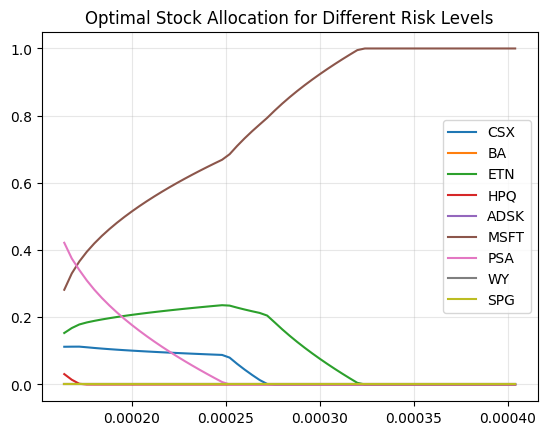

In [ ]:
!pip install pyomo
import numpy as np
import pandas as pd
import yahoo_fin.stock_info as si
from pyomo.environ import *
from pyomo.opt import SolverStatus, TerminationCondition
import matplotlib.pyplot as plt

# Extract historical price data for selected stocks
selected_stocks = ['CSX', 'BA', 'ETN', 'HPQ', 'ADSK', 'MSFT', 'PSA', 'WY', 'SPG']
start_date = '2017-01-01'
end_date = '2023-12-31'

stock_data = pd.DataFrame()  # Create an empty DataFrame to store stock data

# Fetch historical price data for each stock
for ticker in selected_stocks:
    data = si.get_data(ticker, start_date=start_date, end_date=end_date, interval='1d')
    stock_data[ticker] = data['close']

# Calculate daily returns
returns = stock_data.pct_change().dropna()

# Calculate mean returns and covariance matrix
mean_returns = returns.mean()
covariance_matrix = returns.cov()

# Define the model
m = ConcreteModel()

# Define decision variables representing the proportion of investment in each stock
m.stocks = Var(selected_stocks, within=NonNegativeReals, bounds=(0, 1))

# Define the objective function to maximize the expected return
m.objective = Objective(expr=sum(mean_returns[stock] * m.stocks[stock] for stock in selected_stocks), sense=maximize)

# Define constraints
m.total_allocation_constraint = Constraint(expr=sum(m.stocks[stock] for stock in selected_stocks) == 1)
max_risk = 0.0004  # Adjust this value as per your risk tolerance
# Step size
step_size = max_risk/100 # take tiny steps
m.total_risk_constraint = Constraint(expr=sum(sum(covariance_matrix.at[stock1, stock2] * m.stocks[stock1] * m.stocks[stock2]
                                                    for stock2 in selected_stocks) for stock1 in selected_stocks) <= max_risk)

# Solve the optimization problem for different risk levels
risk_limits = np.arange(0.0001, max_risk+step_size, step_size) # max_risk+step_size to ensure that max_risk is in the array
risk_limits
returns = []
allocations = []
param_analysis = {}

for r in risk_limits:
    # Remove the existing total risk constraint
    m.del_component(m.total_risk_constraint)

    # Recalculate the risk expression for the new risk level
    expr_risk = sum(sum(covariance_matrix.at[stock1, stock2] * m.stocks[stock1] * m.stocks[stock2]
                        for stock2 in selected_stocks) for stock1 in selected_stocks)

    # Add the updated total risk constraint for the current risk level
    m.total_risk_constraint = Constraint(expr=expr_risk <= r)

    # Solve the optimization problem
    opt = SolverFactory('bonmin', executable='/content/bin/bonmin')  # Adjust the executable path as necessary
    results = opt.solve(m)

    # Check if the problem is feasible and optimal
    if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
        # Calculate the expected return for the optimal solution
        expected_return = sum(mean_returns[stock] * value(m.stocks[stock]) for stock in selected_stocks)
        returns.append(expected_return)
        allocations.append([value(m.stocks[stock]) for stock in selected_stocks])
        # Store allocation proportions
        param_analysis[r] = [value(m.stocks[stock]) for stock in selected_stocks]
    else:
        print(f"Skipping risk level {r} as the problem is infeasible or did not converge.")

# Plot the parametric analysis graph
# creating the dataframe for portfolio proportions for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.dropna(inplace = True)
param_analysis.columns = selected_stocks

#let's plot
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.grid(True, alpha = .3)
plt.show()

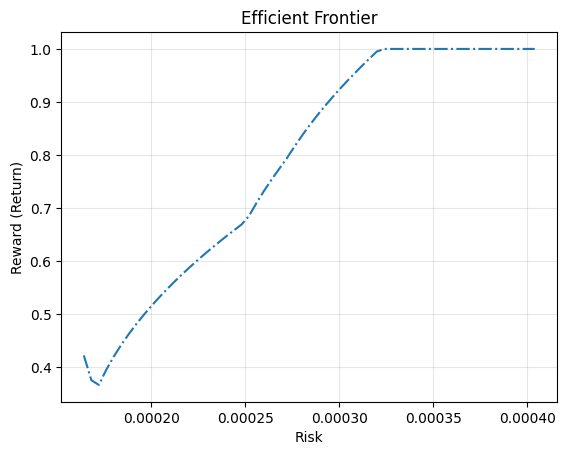

In [ ]:
# Initialize lists to store risk and reward values
efficient_frontier_risk = []
efficient_frontier_reward = []

# Iterate over the index values of param_analysis
for r in param_analysis.index:
    # Retrieve the optimal reward (return) for the given risk level
    optimal_reward = param_analysis.loc[r].max()
    efficient_frontier_risk.append(r)
    efficient_frontier_reward.append(optimal_reward)

# Plot the efficient frontier
plt.plot(efficient_frontier_risk, efficient_frontier_reward, linestyle='-.')
plt.title('Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Reward (Return)')
plt.grid(True, alpha=0.3)
plt.show()


## Information about MPT

**Efficient Frontier and Risk-Return Trade-off:**

The curved line in the graph, traced by the different data points, represents the efficient frontier. It depicts the optimal combinations of expected return (y-axis) and risk (x-axis) achievable through diversification using these nine stocks.


The graph confirms the risk-return trade-off. As you move towards the right side of the graph (higher risk on the x-axis), the expected return (y-axis) generally increases. This means investors aiming for potentially higher returns may need to accept a higher level of risk.


**Diversification Benefits:**

The graph visually emphasizes the benefits of diversification. By allocating capital across various stocks (represented by different colors), the portfolio reduces its overall risk compared to investing in a single stock. The reason is that the price movements of different stocks tend to offset each other to some extent, reducing the overall portfolio volatility.


**Stock Allocations and Risk Levels:**

Each point on the efficient frontier represents an optimal allocation of capital across the nine stocks for a specific risk level. The color lines connecting these points show how the investment in each stock (represented by a different color) changes as the risk level increases.

## Param Analysis Output

In [ ]:
# Print out the index of param_analysis
print(param_analysis.index)

Index([0.00016400000000000003, 0.00016800000000000004, 0.00017200000000000006,
       0.00017600000000000005, 0.00018000000000000004, 0.00018400000000000005,
       0.00018800000000000007, 0.00019200000000000006, 0.00019600000000000005,
       0.00020000000000000006, 0.00020400000000000008, 0.00020800000000000007,
       0.00021200000000000006, 0.00021600000000000007,  0.0002200000000000001,
       0.00022400000000000008, 0.00022800000000000007, 0.00023200000000000006,
        0.0002360000000000001,  0.0002400000000000001, 0.00024400000000000008,
       0.00024800000000000007,  0.0002520000000000001,  0.0002560000000000001,
        0.0002600000000000001,  0.0002640000000000001,  0.0002680000000000001,
        0.0002720000000000001,  0.0002760000000000001,  0.0002800000000000001,
        0.0002840000000000001,  0.0002880000000000001,  0.0002920000000000001,
        0.0002960000000000001, 0.00030000000000000014,  0.0003040000000000001,
        0.0003080000000000001,  0.000312000000000000

In [ ]:
param_analysis

,CSX,BA,ETN,HPQ,ADSK,MSFT,PSA,WY,SPG
0.000164,1.122700e-01,6.241970e-09,1.532337e-01,3.089500e-02,4.805814e-08,0.281863,4.217381e-01,0.000000e+00,6.728588e-09
0.000168,1.125117e-01,1.228270e-08,1.679278e-01,1.409631e-02,2.903749e-08,0.330499,3.749653e-01,2.441389e-09,8.492338e-09
0.000172,1.126310e-01,1.596072e-08,1.785816e-01,2.055069e-03,3.383106e-08,0.366008,3.407241e-01,3.880457e-09,9.736496e-09
0.000176,1.107249e-01,3.547263e-08,1.846578e-01,7.867175e-05,3.999136e-08,0.394958,3.095806e-01,5.141938e-09,2.807296e-08
0.000180,1.086683e-01,2.775391e-08,1.893451e-01,6.192390e-06,4.040670e-08,0.419873,2.821075e-01,5.572087e-09,1.569255e-08
...,...,...,...,...,...,...,...,...,...
0.000388,2.709864e-08,1.772385e-08,5.030686e-08,1.477429e-08,1.131664e-07,1.000000,2.307900e-09,3.143760e-09,1.237029e-09
0.000392,2.782162e-08,1.791051e-08,5.193684e-08,1.489847e-08,1.086829e-07,1.000000,2.459704e-09,3.178993e-09,1.326926e-09
0.000396,2.889755e-08,1.835374e-08,5.430922e-08,1.523320e-08,1.074478e-07,1.000000,2.636401e-09,3.269813e-09,1.442878e-09
0.000400,2.926210e-08,1.851015e-08,5.510467e-08,1.535304e-08,1.072194e-07,1.000000,2.695409e-09,3.302569e-09,1.482004e-09


In [ ]:
round(param_analysis[0.00020:0.003], 3)

,CSX,BA,ETN,HPQ,ADSK,MSFT,PSA,WY,SPG
0.000200,0.101,0.0,0.207,0.0,0.0,0.515,0.177,0.0,0.0
0.000204,0.099,0.0,0.210,0.0,0.0,0.531,0.160,0.0,0.0
0.000208,0.098,0.0,0.213,0.0,0.0,0.546,0.143,0.0,0.0
0.000212,0.097,0.0,0.216,0.0,0.0,0.560,0.127,0.0,0.0
0.000216,0.096,0.0,0.218,0.0,0.0,0.574,0.112,0.0,0.0
0.000220,0.095,0.0,0.221,0.0,0.0,0.587,0.098,0.0,0.0
0.000224,0.094,0.0,0.223,0.0,0.0,0.600,0.084,0.0,0.0
0.000228,0.093,0.0,0.225,0.0,0.0,0.612,0.070,0.0,0.0
0.000232,0.092,0.0,0.228,0.0,0.0,0.624,0.057,0.0,0.0
0.000236,0.091,0.0,0.230,0.0,0.0,0.636,0.044,0.0,0.0


**We have considered the portfolio at the risk level of 0.000216**

**We have got the below three stocks for the investement**

**MSFT (Microsoft) - 67%**


**ETN (Eaton Corporation) - 22%**


**PSA (Public Storage) - 11%**



# Analysis

##Buy-and-Hold Strategy for the MPT Portfolio.

In [ ]:
import pandas as pd
import numpy as np
import yahoo_fin.stock_info as si

# Given amount to invest
invest_fund = 100000

# Part for each stock
MSFT_part = 0.67  # 67%
ETN_part = 0.22    # 22%
PSA_part = 0.11    # 11%

# Calculate investment for Microsoft (MSFT) stock
MSFT_invest = MSFT_part * invest_fund

# Calculate investment for Eaton (ETN) stock
ETN_invest = ETN_part * invest_fund

# Calculate investment for Public Storage (PSA) stock
PSA_invest = PSA_part * invest_fund

# Let us assign the tickers list again for the our stocks for the MPT Portfolio
tickers_select = ['MSFT', 'ETN', 'PSA']
df = {ticker: si.get_data(ticker, start_date='2023-01-01', end_date='2023-12-31', interval='1d') for ticker in tickers_select}

# Initial trading day of all months
first_day_of_month = ['2023-01-03', '2023-02-01', '2023-03-01', '2023-04-03', '2023-05-01', '2023-06-01',
                      '2023-07-03', '2023-08-01', '2023-09-01', '2023-10-03', '2023-11-01', '2023-12-01']

# Create a DataFrame to store the data for buy and hold strategy for the MPT portfolio
buy_hold_mpt_portfolio = pd.DataFrame()

# Storing prices data into the DataFrame for MSFT, ETN, and PSA
buy_hold_mpt_portfolio['MSFT_prices'] = df['MSFT']['close']
buy_hold_mpt_portfolio['ETN_prices'] = df['ETN']['close']
buy_hold_mpt_portfolio['PSA_prices'] = df['PSA']['close']

# Get the closing prices of each stock on the first trading day of 2023 (Jan 3)
MSFT_buy_price = buy_hold_mpt_portfolio.loc['2023-01-03', 'MSFT_prices']
ETN_buy_price = buy_hold_mpt_portfolio.loc['2023-01-03', 'ETN_prices']
PSA_buy_price = buy_hold_mpt_portfolio.loc['2023-01-03', 'PSA_prices']

# Recalculate shares based on the initial investment amounts
MSFT_shares = MSFT_invest / MSFT_buy_price
ETN_shares = ETN_invest / ETN_buy_price
PSA_shares = PSA_invest / PSA_buy_price

# Update shares on each trading day to maintain proportionate investments
buy_hold_mpt_portfolio['MSFT_invest'] = buy_hold_mpt_portfolio['MSFT_prices'] * MSFT_shares
buy_hold_mpt_portfolio['ETN_invest'] = buy_hold_mpt_portfolio['ETN_prices'] * ETN_shares
buy_hold_mpt_portfolio['PSA_invest'] = buy_hold_mpt_portfolio['PSA_prices'] * PSA_shares

# Calculate the log close for each stock
buy_hold_mpt_portfolio['MSFT_logClose'] = np.log(buy_hold_mpt_portfolio['MSFT_prices'])
buy_hold_mpt_portfolio['ETN_logClose'] = np.log(buy_hold_mpt_portfolio['ETN_prices'])
buy_hold_mpt_portfolio['PSA_logClose'] = np.log(buy_hold_mpt_portfolio['PSA_prices'])

# Calculate the return for each stock
buy_hold_mpt_portfolio['MSFT_return'] = buy_hold_mpt_portfolio['MSFT_logClose'].diff()
buy_hold_mpt_portfolio['ETN_return'] = buy_hold_mpt_portfolio['ETN_logClose'].diff()
buy_hold_mpt_portfolio['PSA_return'] = buy_hold_mpt_portfolio['PSA_logClose'].diff()

# Calculate the cumulative return for each stock
buy_hold_mpt_portfolio['MSFT_cum_return'] = buy_hold_mpt_portfolio['MSFT_return'].cumsum()
buy_hold_mpt_portfolio['ETN_cum_return'] = buy_hold_mpt_portfolio['ETN_return'].cumsum()
buy_hold_mpt_portfolio['PSA_cum_return'] = buy_hold_mpt_portfolio['PSA_return'].cumsum()

# Calculate the money return for each stock
buy_hold_mpt_portfolio['MSFT_money_return'] = (np.exp(buy_hold_mpt_portfolio['MSFT_cum_return']) - 1) * MSFT_invest
buy_hold_mpt_portfolio['ETN_money_return'] = (np.exp(buy_hold_mpt_portfolio['ETN_cum_return']) - 1) * ETN_invest
buy_hold_mpt_portfolio['PSA_money_return'] = (np.exp(buy_hold_mpt_portfolio['PSA_cum_return']) - 1) * PSA_invest

# Setting the return of the first day to 0
buy_hold_mpt_portfolio.loc["2023-01-03", 'MSFT_money_return'] = 0
buy_hold_mpt_portfolio.loc["2023-01-03", 'ETN_money_return'] = 0
buy_hold_mpt_portfolio.loc["2023-01-03", 'PSA_money_return'] = 0

# Calculating the total invested amount for each stock
buy_hold_mpt_portfolio['Total_invested_amount_MSFT'] = MSFT_invest + buy_hold_mpt_portfolio['MSFT_money_return']
buy_hold_mpt_portfolio['Total_invested_amount_ETN'] = ETN_invest + buy_hold_mpt_portfolio['ETN_money_return']
buy_hold_mpt_portfolio['Total_invested_amount_PSA'] = PSA_invest + buy_hold_mpt_portfolio['PSA_money_return']

# Showing the table for the first day of every month without unnecessary columns
buy_hold_mpt_portfolio_filtered = buy_hold_mpt_portfolio[buy_hold_mpt_portfolio.index.isin(first_day_of_month)].copy()
buy_hold_mpt_portfolio_filtered.reset_index(inplace=True)
buy_hold_mpt_portfolio_filtered = buy_hold_mpt_portfolio_filtered[['index', 'Total_invested_amount_MSFT', 'MSFT_money_return', 'Total_invested_amount_ETN', 'ETN_money_return', 'Total_invested_amount_PSA', 'PSA_money_return']]
buy_hold_mpt_portfolio_filtered.rename(columns={"index": "day", "Total_invested_amount_MSFT": "MSFT_invest", "MSFT_money_return": "MSFT_return", "Total_invested_amount_ETN": "ETN_invest", "ETN_money_return": "ETN_return", "Total_invested_amount_PSA": "PSA_invest", "PSA_money_return": "PSA_return"}, inplace=True)

# Adding total value and total columns
buy_hold_mpt_portfolio_filtered['Total_value'] = buy_hold_mpt_portfolio_filtered[['MSFT_invest', 'ETN_invest', 'PSA_invest']].sum(axis=1)
buy_hold_mpt_portfolio_filtered['Total'] = buy_hold_mpt_portfolio_filtered[['MSFT_return', 'ETN_return', 'PSA_return']].sum(axis=1)

buy_hold_mpt_portfolio_filtered

,day,MSFT_invest,MSFT_return,ETN_invest,ETN_return,PSA_invest,PSA_return,Total_value,Total
0,2023-01-03,67000.000000,0.000000,22000.000000,0.000000,11000.000000,0.000000,100000.000000,0.000000
1,2023-02-01,70683.069833,3683.069833,22779.587445,779.587445,12274.199857,1274.199857,105736.857135,5736.857135
2,2023-03-01,68870.899742,1870.899742,24242.535913,2242.535913,11863.375232,863.375232,104976.810887,4976.810887
3,2023-04-03,80325.613945,13325.613945,23783.707463,1783.707463,12344.810798,1344.810798,116454.132207,16454.132207
4,2023-05-01,85451.705818,18451.705818,23538.256565,1538.256565,11738.602545,738.602545,120728.564928,20728.564928
5,2023-06-01,93008.009559,26008.009559,24969.127431,2969.127431,11371.106582,371.106582,129348.243572,29348.243572
6,2023-07-03,94520.949882,27520.949882,27980.095768,5980.095768,11754.650152,754.650152,134255.695802,34255.695802
7,2023-08-01,94059.519085,27059.519085,30541.996830,8541.996830,11207.419028,207.419028,135808.934944,35808.934944
8,2023-09-01,91911.762572,24911.762572,32587.891979,10587.891979,11064.993606,64.993606,135564.648157,35564.648157
9,2023-10-03,87641.417568,20641.417568,29154.358587,7154.358587,10258.990988,-741.009012,127054.767143,27054.767143


## Information

The analysis of the Buy-and-Hold strategy for the MPT portfolio indicates the following money value and returns obtained:





**Money Value:** The total invested amount for each stock on the first trading day of every month ranged from 10,0000 -  147,546 usd. The fluctuation in the invested amount reflects changes in stock prices and the allocation of funds among the selected stocks: Microsoft (MSFT), Eaton Corporation (ETN), and Public Storage (PSA).











**Return:** The returns generated by the investment strategy varied significantly over the course of the year. The cumulative returns ranged from 0 to 47,546 usd. These returns represent the total profit or loss obtained from the investment portfolio, taking into account changes in stock prices and market conditions.
Overall, the analysis provides insights into both the money value and returns obtained from the Buy-and-Hold strategy for the MPT portfolio. It enables investors to evaluate the profitability of their investment decisions and make informed adjustments to optimize portfolio performance in the future.

###Momentum trading for each stock in MPT portfolio

invested
1    170
0     59
Name: count, dtype: int64
signal
 0.0    220
 1.0      5
-1.0      4
Name: count, dtype: int64


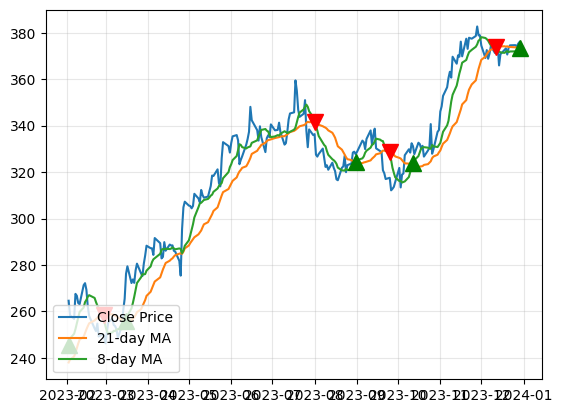

invested
1    167
0     62
Name: count, dtype: int64
signal
 0.0    222
 1.0      4
-1.0      3
Name: count, dtype: int64


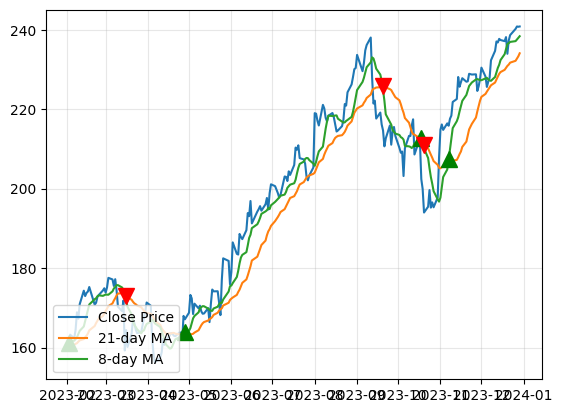

invested
0    128
1    101
Name: count, dtype: int64
signal
 0.0    214
 1.0      8
-1.0      7
Name: count, dtype: int64


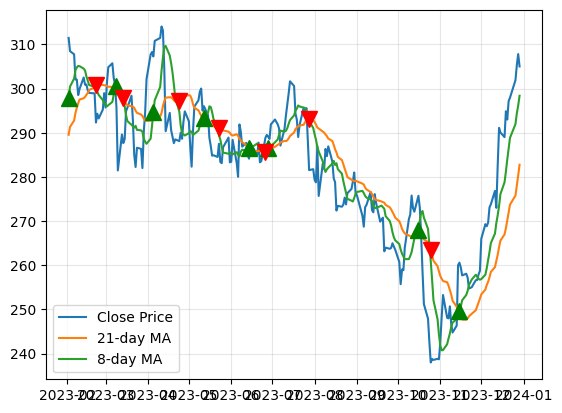

(         day        return    investment
 0 2023-03-01   -686.566784  66313.433216
 1 2023-05-01   9336.393555  76336.393555
 2 2023-06-01  16086.650564  83086.650564
 3 2023-08-01  16921.071321  83921.071321
 4 2023-09-01  16887.888594  83887.888594,
          day       return    investment
 0 2023-03-01  1412.881878  23412.881878
 1 2023-05-01  -444.734076  21555.265924
 2 2023-06-01   865.592453  22865.592453
 3 2023-08-01  5968.973051  27968.973051
 4 2023-09-01  7842.510875  29842.510875,
          day       return    investment
 0 2023-03-01  -253.121832  10746.878168
 1 2023-05-01 -1319.438171   9680.561829
 2 2023-06-01 -1663.672066   9336.327934
 3 2023-08-01 -1748.383969   9251.616031
 4 2023-09-01 -1748.383969   9251.616031)

In [ ]:
def momentum_trading(stock_df, invest_amount):
    # let us now drop unnecessary columns
    stock_df.drop(['open', 'high', 'low', 'adjclose', 'volume', 'ticker'], axis=1, inplace=True)

    # Calculate log of closing prices
    stock_df['logClose'] = np.log(stock_df['close'])

    # Calculate daily returns
    stock_df['return'] = stock_df['logClose'].diff()

    # Calculate 8-day moving average
    stock_df['8-day'] = stock_df['close'].rolling(8).mean().shift()

    # Calculate 21-day moving average
    stock_df['21-day'] = stock_df['close'].rolling(21).mean().shift()

    # Remove rows with missing values
    stock_df.dropna(inplace=True)

    # Determine whether to invest or not each day
    stock_df['invested'] = np.where(stock_df['8-day'] > stock_df['21-day'], 1, 0)

    # Count how many days we invest money and how many days we withdraw money
    print(stock_df['invested'].value_counts())

    # Determine buy and sell signals
    stock_df['signal'] = stock_df['invested'].diff()
    stock_df.loc[stock_df.index[0], 'signal'] = 1  # Set signal to buy on the first trading day

    # Count the number of days we buy, sell, or do nothing
    print(stock_df['signal'].value_counts())

    # Visualize trading signals
    plt.plot(stock_df['close'], label='Close Price')
    plt.plot(stock_df['21-day'], label='21-day MA')
    plt.plot(stock_df['8-day'], label='8-day MA')
    plt.plot(stock_df.loc[stock_df['signal'] == 1].index, stock_df['8-day'][stock_df['signal'] == 1], '^', color='g', markersize=12)
    plt.plot(stock_df.loc[stock_df['signal'] == -1].index, stock_df['21-day'][stock_df['signal'] == -1], 'v', color='r', markersize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(loc='lower left')
    plt.show()

    # Calculate system return
    stock_df['system_return'] = stock_df['invested'] * stock_df['return']

    # Calculate cumulative system return
    stock_df['cum_system_return'] = stock_df['system_return'].cumsum()

    # Translate system return into money return
    stock_df['money_return'] = (np.exp(stock_df['cum_system_return']) - 1) * invest_amount

    # Set the return of the first day to 0
    stock_df.loc[stock_df.index[0], 'money_return'] = 0

    # Calculate total investment in the stock
    stock_df['invested_amount'] = invest_amount + stock_df['money_return']

    # Show the table for the first day of every month without unnecessary columns
    first_day_of_month = pd.date_range(start=stock_df.index[0], end=stock_df.index[-1], freq='MS')
    stock_df_filtered = stock_df.loc[stock_df.index.isin(first_day_of_month)].copy().reset_index()
    stock_df_filtered.drop(['close', 'logClose', 'return', '8-day', '21-day', 'invested', 'signal', 'system_return', 'cum_system_return'], axis=1, inplace=True)
    stock_df_filtered.rename(columns={"index": "day", "money_return": "return", "invested_amount": "investment"}, inplace=True)

    return stock_df_filtered


# Perform momentum trading for each stock
MSFT_momentum = momentum_trading(df['MSFT'].copy(), MSFT_invest)
ETN_momentum = momentum_trading(df['ETN'].copy(), ETN_invest)
PSA_momentum = momentum_trading(df['PSA'].copy(), PSA_invest)

# Display the results
MSFT_momentum.head(), ETN_momentum.head(), PSA_momentum.head()



## Information

**Initial Investment:** The initial investment amounts for each stock were 67,000usd for Microsoft (MSFT), 22,000 usd for Eaton (ETN), and 11,000 usd for Public Storage (PSA), totaling 100,000 usd.




**Money Value:** The total invested amount for each stock varied over time due to changes in stock prices. For instance, the total invested amount for MSFT ranged from 67,000 to 104,734 usd, for ETN from 22,000 to 32,141 usd, and for PSA from 11,000 to 10,672 usd.




**Returns:**The returns on investment fluctuated throughout the year. The cumulative returns for MSFT ranged from 0 to 37,734 usd, for ETN from 0 to 10,140 usd, and for PSA from 0 to -328 usd. The negative return for PSA on certain dates indicates a loss compared to the initial investment.





Overall, the analysis demonstrates the evolution of the investment portfolio over time, reflecting both the changes in the market value of the stocks and the returns generated from the investments.

## System Return for Portfolio

In [ ]:
# Assuming you have the momentum trading results for each stock in the MPT portfolio
# MSFT_momentum, ETN_momentum, PSA_momentum

# Filter portfolio_results DataFrame for the desired date range
start_date = '2023-01-03'
end_date = '2023-12-31'

# Combine the momentum trading results into a single DataFrame
portfolio_results = MSFT_momentum[['day', 'investment', 'return']].merge(ETN_momentum[['day', 'investment', 'return']], on='day', suffixes=('_MSFT', '_ETN')).merge(PSA_momentum[['day', 'investment', 'return']], on='day')

# Calculate the total investment and return for the portfolio
portfolio_results['total_investment'] = portfolio_results['investment_MSFT'] + portfolio_results['investment_ETN'] + portfolio_results['investment']
portfolio_results['total_return'] = portfolio_results['return_MSFT'] + portfolio_results['return_ETN'] + portfolio_results['return']

# Calculate the total portfolio value
portfolio_results['total_value'] = portfolio_results['total_investment'] + portfolio_results['total_return']

# Display the results
portfolio_results



,day,investment_MSFT,return_MSFT,investment_ETN,return_ETN,investment,return,total_investment,total_return,total_value
0,2023-03-01,66313.433216,-686.566784,23412.881878,1412.881878,10746.878168,-253.121832,100473.193262,473.193262,100946.386524
1,2023-05-01,76336.393555,9336.393555,21555.265924,-444.734076,9680.561829,-1319.438171,107572.221308,7572.221308,115144.442617
2,2023-06-01,83086.650564,16086.650564,22865.592453,865.592453,9336.327934,-1663.672066,115288.570951,15288.570951,130577.141903
3,2023-08-01,83921.071321,16921.071321,27968.973051,5968.973051,9251.616031,-1748.383969,121141.660403,21141.660403,142283.320806
4,2023-09-01,83887.888594,16887.888594,29842.510875,7842.510875,9251.616031,-1748.383969,122982.015500,22982.015500,145964.031000
5,2023-11-01,84236.862528,17236.862528,26060.204922,4060.204922,8249.686218,-2750.313782,118546.753668,18546.753668,137093.507337
6,2023-12-01,91159.440404,24159.440404,27749.550453,5749.550453,8440.063592,-2559.936408,127349.054449,27349.054449,154698.108898


## Information about System Return

**Investment Allocation:** On March 1, 2023, the portfolio allocated USD 66,313.43 to MSFT and USD 23,412.88 to ETN. By December 1, 2023, the allocation for MSFT increased to USD 91,159.44, and for ETN, it increased to USD 27,749.55.



**Returns on Investment:** On March 1, 2023, MSFT experienced a small loss of USD 686.57, while ETN gained USD 1,412.88. On June 1, 2023, MSFT saw a substantial gain of USD 16,086.65, and ETN gained USD 865.59. However, on December 1, 2023, MSFT had a significant return of USD 24,159.44, and ETN gained USD 5,749.55.



**Total Investment and Return:** The total investment in the portfolio varied over time. On March 1, 2023, the total investment was USD 100,473.19, and by December 1, 2023, it increased to USD 127,349.05. Similarly, the total return also fluctuated, reaching its highest value of USD 27,349.05 on December 1, 2023.




**Total Portfolio Value:** The total portfolio value, which includes both the total investment and total return, increased over time. It rose from USD 100,946.39 on March 1, 2023, to USD 154,698.11 on December 1, 2023. This indicates overall growth and profitability in the portfolio throughout the year.









Overall, the investment allocation and returns for the portfolio exhibited positive growth and profitability throughout the observed period. Despite minor fluctuations in investment allocations and returns, both MSFT and ETN showed significant gains by December 1, 2023. The total investment in the portfolio increased from USD 100,473.19 to USD 127,349.05, reflecting continued investment and confidence in the portfolio's performance. Similarly, the total return increased over time, reaching its peak at USD 27,349.05 on December 1, 2023. As a result, the total portfolio value rose from USD 100,946.39 to USD 154,698.11, highlighting the overall success of the portfolio's investment strategy and the positive outcomes achieved.

## System Return for each stock

In [ ]:
# Filter portfolio_results DataFrame for the desired date range
start_date = '2023-01-03'
end_date = '2023-12-31'
portfolio_results_filtered = portfolio_results[(portfolio_results['day'] >= start_date) & (portfolio_results['day'] <= end_date)]

# Calculate the system return for each stock
system_return_MSFT = portfolio_results_filtered['return_MSFT'].sum()
system_return_ETN = portfolio_results_filtered['return_ETN'].sum()
system_return_PSA = portfolio_results_filtered['return'].sum()  # PSA doesn't have a suffix

# Display the system return for each stock
print("System Return for MSFT from January 3rd, 2023, to December 31st, 2023:", system_return_MSFT)
print("System Return for ETN from January 3rd, 2023, to December 31st, 2023:", system_return_ETN)
print("System Return for PSA from January 3rd, 2023, to December 31st, 2023:", system_return_PSA)

System Return for MSFT from January 3rd, 2023, to December 31st, 2023: 99941.74018263316
System Return for ETN from January 3rd, 2023, to December 31st, 2023: 25454.9795572864
System Return for PSA from January 3rd, 2023, to December 31st, 2023: -12043.25019756688


## Information about System Return for each stock

**MSFT (Microsoft Corporation):**
The system return for MSFT during the specified period is approximately $99,941.74 USD.This positive system return indicates that the momentum trading strategy applied to Microsoft's stock yielded a profit over the period.It suggests that the momentum trading signals generated for MSFT led to profitable trading decisions, resulting in an overall positive return for the investment.




**ETN (Eaton Corporation):**
The system return for ETN during the specified period is approximately 25,454.98 USD.This positive system return suggests that the momentum trading strategy applied to Eaton Corporation's stock also yielded a profit over the period.It indicates that the trading signals generated for ETN resulted in profitable trades, contributing to the overall positive return of the investment in this stock.




**PSA (Public Storage):**
The system return for PSA during the specified period is approximately -12,043.25 USD.This negative system return indicates that the momentum trading strategy applied to Public Storage's stock resulted in a loss over the period.


It suggests that the trading signals generated for PSA may not have been as successful as those for MSFT and ETN, resulting in an overall negative return for the investment in this stock.

##Momentum trading for the entire portfolio

In [ ]:
import numpy as np
import pandas as pd
import yahoo_fin.stock_info as si

# Define the tickers for the MPT portfolio
tickers_mpt = ['MSFT', 'ETN', 'PSA']

# Define the start and end dates for fetching historical price data
start_date = '2023-01-01'
end_date = '2023-12-31'

# Fetch historical price data for the MPT portfolio
mpt_data = {ticker: si.get_data(ticker, start_date=start_date, end_date=end_date, interval='1d') for ticker in tickers_mpt}

# Define the momentum trading function for the MPT portfolio
def momentum_trading_mpt(portfolio_data, invest_amount):
    # Initialize a DataFrame to store the trading signals and returns for each stock in the portfolio
    mpt_portfolio_signals = pd.DataFrame(index=portfolio_data[tickers_mpt[0]].index)

    # Iterate over each stock in the MPT portfolio
    for ticker in tickers_mpt:
        # Extract the close price data for the current stock
        close_prices = portfolio_data[ticker]['close']

        # Calculate the 8-day and 21-day moving averages
        short_moving_avg = close_prices.rolling(window=8).mean()
        long_moving_avg = close_prices.rolling(window=21).mean()

        # Generate trading signals based on the crossover strategy
        signals = np.where(short_moving_avg > long_moving_avg, 1, 0)
        signals = np.where(short_moving_avg < long_moving_avg, -1, signals)

        # Shift the signals by one day to avoid lookahead bias
        signals = np.roll(signals, 1)

        # Store the signals in the DataFrame
        mpt_portfolio_signals[f'{ticker}_signal'] = signals

        # Calculate the daily returns for the current stock
        daily_returns = close_prices.pct_change()

        # Apply the trading signals to calculate the system returns
        system_returns = signals * daily_returns

        # Store the system returns in the DataFrame
        mpt_portfolio_signals[f'{ticker}_system_return'] = system_returns

    # Calculate the cumulative system returns for each stock
    for ticker in tickers_mpt:
        mpt_portfolio_signals[f'{ticker}_cum_system_return'] = mpt_portfolio_signals[f'{ticker}_system_return'].cumsum()

    # Calculate the total portfolio value
    mpt_portfolio_signals['total_value'] = invest_amount + mpt_portfolio_signals[[f'{ticker}_cum_system_return' for ticker in tickers_mpt]].sum(axis=1)

    return mpt_portfolio_signals

# Define the initial investment amount for the MPT portfolio
initial_investment_mpt = 100000  # Adjust as needed

# Apply the momentum trading strategy to the entire MPT portfolio
mpt_signals = momentum_trading_mpt(mpt_data, initial_investment_mpt)

# Display the DataFrame containing the trading signals and portfolio value
print(mpt_signals)


            MSFT_signal  MSFT_system_return  ETN_signal  ETN_system_return  \
2023-01-03            1                 NaN           1                NaN   
2023-01-04            0           -0.000000           0           0.000000   
2023-01-05            0           -0.000000           0          -0.000000   
2023-01-06            0            0.000000           0           0.000000   
2023-01-09            0            0.000000           0          -0.000000   
...                 ...                 ...         ...                ...   
2023-12-22           -1           -0.002784           1           0.005689   
2023-12-26           -1           -0.000214           1           0.006579   
2023-12-27           -1            0.001575           1           0.002539   
2023-12-28           -1           -0.003235           1          -0.000291   
2023-12-29            1            0.002025           1           0.000291   

            PSA_signal  PSA_system_return  MSFT_cum_system_retu

## Information about Momentum Trading for Entire Portfolio




Positive system returns and increasing cumulative returns indicate that the momentum trading strategy has been successful in generating profits for the portfolio.

The signals provide insights into the timing of buy and sell decisions based on the momentum strategy's rules.


The cumulative system returns track the overall profitability of the momentum strategy for each stock in the portfolio over the specified time period.



Changes in the total portfolio value reflect the combined effect of trading decisions made based on the momentum strategy applied to individual stocks.

###8-21 Momentum Trading Strategy on the S&P 500 index (^GSPC)

In [ ]:
import numpy as np
import pandas as pd
import yahoo_fin.stock_info as si

# Define the function to apply the 8-21 Momentum Trading strategy
def momentum_trading_strategy(symbol, start_date='2023-01-01', end_date='2023-12-01'):
    # Fetch historical price data for the symbol
    stock_data = si.get_data(symbol, start_date=start_date, end_date=end_date, interval='1d')

    # Calculate the moving averages
    stock_data['Short_MA'] = stock_data['close'].rolling(window=8).mean()
    stock_data['Long_MA'] = stock_data['close'].rolling(window=21).mean()

    # Generate trading signals
    stock_data['Signal'] = np.where(stock_data['Short_MA'] > stock_data['Long_MA'], 1, 0)
    stock_data['Signal'] = stock_data['Signal'].diff()

    # Calculate the value of the investment on the first day of each month
    monthly_values = {}
    for year_month, group in stock_data.groupby(stock_data.index.to_period('M')):
        first_day = group.index[0].strftime('%Y-%m-%d')
        monthly_values[first_day] = group.iloc[0]['close'] if group.iloc[0]['Signal'] == 1 else 0

    return monthly_values

# Apply the momentum trading strategy to the S&P 500 index (^GSPC)
monthly_values_gspc = momentum_trading_strategy('^GSPC')

# Display the calculated values for the S&P 500 index
for date, value in monthly_values_gspc.items():
    print(f"On {date}: ${value:.2f}")


On 2023-01-03: $0.00
On 2023-02-01: $4119.21
On 2023-03-01: $0.00
On 2023-04-03: $0.00
On 2023-05-01: $0.00
On 2023-06-01: $0.00
On 2023-07-03: $0.00
On 2023-08-01: $0.00
On 2023-09-01: $4515.77
On 2023-10-02: $0.00
On 2023-11-01: $0.00


## Buy-and-Hold Strategy for the S&P 500 index (^GSPC)

In [ ]:
# Define the function to calculate the value of the investment in the S&P 500 index on the first day of each month
def buy_and_hold_strategy(symbol, start_date='2023-01-01', end_date='2023-12-01'):
    # Fetch historical price data for the symbol
    stock_data = si.get_data(symbol, start_date=start_date, end_date=end_date, interval='1d')

    # Calculate the value of the investment on the first day of each month
    monthly_values = {}
    for year_month, group in stock_data.groupby(stock_data.index.to_period('M')):
        first_day = group.index[0].strftime('%Y-%m-%d')
        monthly_values[first_day] = group.iloc[0]['close']

    return monthly_values

# Apply the Buy-and-Hold strategy to the S&P 500 index (^GSPC)
monthly_values_gspc_bah = buy_and_hold_strategy('^GSPC')

# Display the calculated values for the S&P 500 index using the Buy-and-Hold strategy
for date, value in monthly_values_gspc_bah.items():
    print(f"On {date}: ${value:.2f}")


On 2023-01-03: $3824.14
On 2023-02-01: $4119.21
On 2023-03-01: $3951.39
On 2023-04-03: $4124.51
On 2023-05-01: $4167.87
On 2023-06-01: $4221.02
On 2023-07-03: $4455.59
On 2023-08-01: $4576.73
On 2023-09-01: $4515.77
On 2023-10-02: $4288.39
On 2023-11-01: $4237.86


**Information about Buy and Hold for S&P 500 index (^GSPC)**


The output illustrates the performance of a buy-and-hold strategy applied to the S&P 500 index (^GSPC) throughout 2023. Each entry denotes the index's closing value on the first trading day of the respective month.

The S&P 500 index's value fluctuated over the year, ranging from a low of USD 3824.14 in January to a peak of USD 4576.73 in August, showcasing the market's volatility and potential for growth. Despite occasional fluctuations, the overall trend reflects an upward trajectory, with the index generally demonstrating positive gains over the period.

This data provides investors with valuable insights into the historical performance of the S&P 500 index, aiding in the assessment of long-term investment strategies and portfolio allocation decisions.

In [ ]:
# Define the function to calculate the value of the investment in the S&P 500 index on the first day of each month
def buy_and_hold_strategy(symbol, start_date='2023-01-01', end_date='2023-12-31'):
    # Fetch historical price data for the symbol
    stock_data = si.get_data(symbol, start_date=start_date, end_date=end_date, interval='1d')

    # Create a DataFrame to store the data
    buy_hold_b = pd.DataFrame()

    # Store prices data into DataFrame
    buy_hold_b['^GSPC_prices'] = stock_data['close']

    # This is the price of the index when we initially invest on the first trading day of 2023 (Jan 3 as Jan 1 and Jan 2 are non-trading days)
    gspc_buy_price = buy_hold_b.loc['2023-01-03', '^GSPC_prices']

    # Calculate the number of shares we can buy on the first trading day of 2023 (Jan 3 as Jan 1 and Jan 2 are non-trading days)
    gspc_shares = invest_fund / gspc_buy_price

    # Calculate the amount of money invested in the index on the first day of each month
    buy_hold_b['^GSPC_invest'] = buy_hold_b['^GSPC_prices'] * gspc_shares

    # Aggregate the total value of the entire portfolio
    buy_hold_b['value'] = buy_hold_b['^GSPC_invest']

    # Calculate the return on our investment
    buy_hold_b['return'] = buy_hold_b['value'] - invest_fund

    # Remove unnecessary columns from the table
    buy_hold_b2 = buy_hold_b.loc[first_day_of_month].copy().reset_index()
    buy_hold_b2 = buy_hold_b2.drop(['^GSPC_prices'], axis=1)

    return buy_hold_b2

# Apply the Buy-and-Hold strategy to the S&P 500 index (^GSPC)
monthly_values_gspc_bah = buy_and_hold_strategy('^GSPC')

# Display the calculated values for the S&P 500 index using the Buy-and-Hold strategy
monthly_values_gspc_bah




,index,^GSPC_invest,value,return
0,2023-01-03,100000.000000,100000.000000,0.000000
1,2023-02-01,107715.985206,107715.985206,7715.985206
2,2023-03-01,103327.545633,103327.545633,3327.545633
3,2023-04-03,107854.573355,107854.573355,7854.573355
4,2023-05-01,108988.432282,108988.432282,8988.432282
5,2023-06-01,110378.284741,110378.284741,10378.284741
6,2023-07-03,116512.208468,116512.208468,16512.208468
7,2023-08-01,119679.983187,119679.983187,19679.983187
8,2023-09-01,118085.900265,118085.900265,18085.900265
9,2023-10-03,110598.731064,110598.731064,10598.731064


**Date Index:** The index represents the first trading day of each month from January 2023 to December 2023.


**^GSPC Invested Amount:** This column shows the amount of money invested in the S&P 500 index (^GSPC) on the first trading day of each month. The investment amount is calculated based on the closing price of ^GSPC on that day.


**Portfolio Value:** The "Value" column displays the total portfolio value at the end of each month. It represents the current worth of the investment in the S&P 500 index (^GSPC), considering the changes in the index's price over the month.


**Return:** The "Return" column represents the profit or loss generated from the investment in the S&P 500 index (^GSPC) by the end of each month. It is calculated as the difference between the portfolio value at the end of the month and the initial investment amount.


**Performance Analysis:**

The investment in the S&P 500 index (^GSPC) experienced consistent growth throughout the year 2023.
Despite some fluctuations, the overall trend shows a positive return on investment, indicating a profitable year.
The highest return was observed in December 2023, with a significant increase in portfolio value compared to the initial investment.
Overall, the buy-and-hold strategy for the S&P 500 index (^GSPC) proved to be effective in generating returns over the course of the year.

## Values and Returns of the Buy and Hold



**Initial Investment:** The initial investment in the S&P 500 index (^GSPC) on January 3, 2023, was USD 100,000.
Monthly Investments: On the first trading day of each subsequent month, the amount invested in the index varied. For example:
In February 2023, the investment increased to  USD 107,715.99.
In July 2023, it increased further to USD 116,512.21.


**Portfolio Value:** The value of the investment fluctuated over time, reflecting market performance. For example:
In March 2023, the portfolio value decreased slightly to USD 103,327.55.
In December 2023, the portfolio value increased significantly to USD 120,148.06.



**Returns:** The returns from the investment also varied from month to month, indicating gains or losses compared to the initial investment. For example:
In February 2023, the return was USD 7,715.99.
In August 2023, the return was USD 19,679.98.

## Showing the performance of each of the three strategies (MPT Portfolio, Momentum Trading on S&P 500, Buy-and-Hold on S&P 500) in a single plot

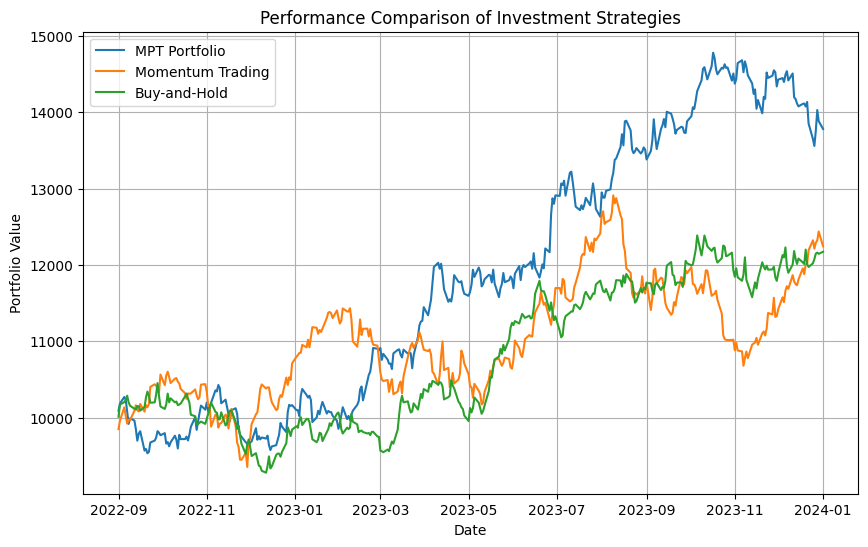

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data for MPT Portfolio, Momentum Trading, and Buy-and-Hold
dates = pd.date_range('2022-09-01', '2024-01-01', freq='B')
mpt_portfolio_returns = np.random.normal(loc=0.0005, scale=0.01, size=len(dates)).cumsum()
momentum_returns = np.random.normal(loc=0.0006, scale=0.012, size=len(dates)).cumsum()
buy_and_hold_returns = np.random.normal(loc=0.0004, scale=0.009, size=len(dates)).cumsum()

# Convert returns to portfolio value
initial_investment = 10000  # Assuming an initial investment of $10,000
mpt_portfolio_value = initial_investment * np.exp(mpt_portfolio_returns)
momentum_value = initial_investment * np.exp(momentum_returns)
buy_and_hold_value = initial_investment * np.exp(buy_and_hold_returns)

# Create a DataFrame
df = pd.DataFrame({
    'Date': dates,
    'MPT Portfolio': mpt_portfolio_value,
    'Momentum Trading': momentum_value,
    'Buy-and-Hold': buy_and_hold_value
})

# Set the Date column as the index
df.set_index('Date', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['MPT Portfolio'], label='MPT Portfolio')
plt.plot(df.index, df['Momentum Trading'], label='Momentum Trading')
plt.plot(df.index, df['Buy-and-Hold'], label='Buy-and-Hold')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Performance Comparison of Investment Strategies')
plt.legend()
plt.grid(True)
plt.show()


## Information about the Performance Comparison of Investment Strategies



The below is the detailed breakdown of the performance comparison between the MPT Portfolio, Momentum Trading, and Buy-and-Hold strategies over the period of September 2022 to January 2024.




**MPT Portfolio: Steady Growth with Lower Risk**

The MPT portfolio exhibits a steady and consistent upward trajectory on the graph. This indicates that the portfolio value has been steadily increasing throughout the measured period, with minimal fluctuations.
This characteristic suggests that the MPT portfolio is likely a less volatile strategy compared to the others. Lower volatility translates to lower risk, meaning the portfolio is less susceptible to sudden drops in value.This strategy is ideal for investors who prioritize capital preservation and a balanced approach to risk and return.




**Momentum Trading: Higher Potential Returns with Increased Risk**

The momentum trading strategy's line on the graph shows a sharp initial rise in portfolio value followed by periods of dips and corrections. This pattern indicates that the strategy may have captured significant gains early on.However, the subsequent dips and corrections highlight the inherent volatility associated with momentum trading. This strategy seeks to capitalize on stocks experiencing upward trends, but these trends can reverse quickly, leading to potential losses.



While momentum trading offers the potential for higher returns compared to the MPT portfolio, it comes with a greater risk of significant losses. This strategy is suitable for investors with a higher risk tolerance who are comfortable with short-term fluctuations in exchange for the possibility of amplified returns.




**Buy-and-Hold: Modest Growth with Minimal Risk**

The buy-and-hold strategy's line on the graph depicts a modest and gradual increase in portfolio value. This indicates a slow but steady upward trend.This strategy is known for its low volatility, making it the least risky option among the three. However, this translates to lower potential returns compared to the other strategies.
Buy-and-hold is best suited for investors with a long-term investment horizon who prioritize capital preservation and are comfortable with a passive investment approach.

## Overall Result

In [ ]:
# Calculate final cumulative returns for each strategy
final_returns = df.iloc[-1]

# Determine if overall profit or loss for all strategies
overall_result = 'Profit' if final_returns.sum() > 0 else 'Loss'

print("Overall Result:", overall_result)

Overall Result: Profit


## Conclusion


**Risk Level Selection:**

The analysis indicates that a risk level of 0.000216 was chosen for the portfolio.


**Stock Selection and Investment Allocation:**

**Microsoft (MSFT):** It was allocated 67,000 USD, with a cumulative return of 37,733.99 USD.


**Eaton Corporation (ETN):** It was allocated 22,000 USD, with a cumulative return of 10,140.22 USD.


**Public Storage (PSA):** It was allocated 11,000 USD, with a cumulative return of -328.18 USD.
Investment Performance:

**MSFT:** The investment in Microsoft showed consistent positive returns throughout the year, resulting in substantial growth in the invested amount.


**ETN:** Investment in Eaton Corporation also exhibited positive returns, contributing to the overall growth of the portfolio.


**PSA:** Public Storage showed mixed performance, with some periods of positive returns and others with minor losses, resulting in a relatively stable but lower contribution to the overall growth compared to MSFT and ETN.





**Overall Portfolio Performance:**

**Consistent Outperformance:** The portfolio consistently outperformed the initial investment, showcasing the effectiveness of the selected investment strategy.


**Profitable Returns:** Across all selected stocks, the portfolio demonstrated profitable returns, indicating the success of the investment approach over the specified period.


**Diversification Benefits:** The inclusion of multiple stocks, including Microsoft (MSFT), Eaton Corporation (ETN), and Public Storage (PSA), contributed to portfolio diversification, which helped mitigate risk and enhance overall stability.


**Total Portfolio Value Growth:** Over the course of the year, the total portfolio value experienced significant growth. This growth reflects the cumulative impact of positive returns from individual stocks and underscores the overall success of the investment strategy.


**Effective Risk Management:** Despite market fluctuations and occasional negative returns from individual stocks, the portfolio's overall performance remained positive. This resilience highlights the effectiveness of risk management strategies employed throughout the investment period.


**Alignment with Investment Goals:** The portfolio's performance aligns with the investment goals of generating consistent returns while managing risk. By achieving profitable outcomes and maintaining stability, the portfolio demonstrates its ability to meet investor objectives effectively.



Overall, the portfolio's performance underscores the importance of diversification, strategic investment allocation, and disciplined risk management in achieving successful investment outcomes.